# WeatherPy
----



In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#create urls components

base_url= "https://api.openweathermap.org/data/2.5/weather?"

key = f"appid={weather_api_key}"

unit_query = f"units=imperial"

#setup

name =[]
lat_cord =[]
long_cord =[]
max_temp =[]
hum =[]
cloud =[]
wind =[]
country =[]
date =[]

set_no = 1
record_no = 0

#perform API calls and display log

print("Beginning Data Retrieval\n-----------------------------")
    
for city in cities:
    
    #tracking set
    if record_no==50:
        set_no+=1
        record_no=0
    else:
        pass
            
     #make call - append data to list if response code is 200, 
        #otherwise report "skippping" or "error" depending on reason. 
    
    #allow exception to prevent interruption 
    try: 
        pulls = requests.get(f"{base_url}q={city}&{unit_query}&{key}")
    
        if pulls.status_code == 200:

            record_no+=1

            print(f"Processing Record {record_no} of set {set_no} | {city}")

            #pull data of interest
            name.append(pulls.json()["name"])
            lat_cord.append(pulls.json()["coord"]["lat"])
            long_cord.append(pulls.json()["coord"]["lon"])
            max_temp.append(pulls.json()["main"]["temp_max"])
            hum.append(pulls.json()["main"]["humidity"])
            cloud.append(pulls.json()["clouds"]["all"])
            wind.append(pulls.json()["wind"]["speed"])
            country.append(pulls.json()["sys"]["country"])
            date.append(pulls.json()["dt"])

        elif pulls.status_code == 404: 
            print(f"City not found . Skipping... {city}")

        else:
            print("error")
            
        time.sleep(1)
        
    except:
         pass   
        
    # Add a one second interval between queries to stay within API query limits
        

print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found . Skipping... kazalinsk
Processing Record 1 of set 1 | albany
Processing Record 2 of set 1 | jamestown
Processing Record 3 of set 1 | mataura
Processing Record 4 of set 1 | barrow
Processing Record 5 of set 1 | klaksvik
Processing Record 6 of set 1 | kaitong
Processing Record 7 of set 1 | ushuaia
Processing Record 8 of set 1 | provideniya
Processing Record 9 of set 1 | bima
Processing Record 10 of set 1 | rikitea
Processing Record 11 of set 1 | vao
Processing Record 12 of set 1 | inhambane
Processing Record 13 of set 1 | merauke
Processing Record 14 of set 1 | alvorada
Processing Record 15 of set 1 | bluff
Processing Record 16 of set 1 | dingle
Processing Record 17 of set 1 | pacifica
Processing Record 18 of set 1 | kapaa
Processing Record 19 of set 1 | tombouctou
Processing Record 20 of set 1 | mahebourg
Processing Record 21 of set 1 | solntsevo
Processing Record 22 of set 1 | yellowknife
Processing Record 23 of set

Processing Record 38 of set 4 | abu kamal
Processing Record 39 of set 4 | villamontes
Processing Record 40 of set 4 | agbor
Processing Record 41 of set 4 | lucapa
Processing Record 42 of set 4 | rawson
Processing Record 43 of set 4 | mier
Processing Record 44 of set 4 | kasongo-lunda
Processing Record 45 of set 4 | dudinka
Processing Record 46 of set 4 | iquique
Processing Record 47 of set 4 | poum
Processing Record 48 of set 4 | kulhudhuffushi
Processing Record 49 of set 4 | la ronge
Processing Record 50 of set 4 | kajaani
Processing Record 1 of set 5 | sao jose da coroa grande
City not found . Skipping... ust-kamchatsk
Processing Record 2 of set 5 | akhtubinsk
Processing Record 3 of set 5 | jacareacanga
Processing Record 4 of set 5 | geraldton
Processing Record 5 of set 5 | whithorn
Processing Record 6 of set 5 | maniitsoq
Processing Record 7 of set 5 | cockburn town
Processing Record 8 of set 5 | necochea
Processing Record 9 of set 5 | mafinga
Processing Record 10 of set 5 | bengkul

Processing Record 20 of set 8 | casimcea
Processing Record 21 of set 8 | rohatyn
City not found . Skipping... meyungs
Processing Record 22 of set 8 | nanortalik
Processing Record 23 of set 8 | tupanatinga
Processing Record 24 of set 8 | buin
Processing Record 25 of set 8 | meadow lake
Processing Record 26 of set 8 | chaykovskiy
Processing Record 27 of set 8 | dongobesh
Processing Record 28 of set 8 | hasanabad
Processing Record 29 of set 8 | kang
Processing Record 30 of set 8 | cradock
Processing Record 31 of set 8 | susanville
Processing Record 32 of set 8 | jiangyou
Processing Record 33 of set 8 | doka
Processing Record 34 of set 8 | araouane
Processing Record 35 of set 8 | vanimo
Processing Record 36 of set 8 | santa helena de goias
Processing Record 37 of set 8 | benjamin constant
Processing Record 38 of set 8 | severomuysk
City not found . Skipping... saleaula
Processing Record 39 of set 8 | keuruu
Processing Record 40 of set 8 | sena madureira
City not found . Skipping... tarudan

Processing Record 48 of set 11 | raga
Processing Record 49 of set 11 | alexandria
Processing Record 50 of set 11 | dalbandin
Processing Record 1 of set 12 | luwingu
Processing Record 2 of set 12 | muncar
Processing Record 3 of set 12 | ivanovka
Processing Record 4 of set 12 | bamnet narong
Processing Record 5 of set 12 | lasa
Processing Record 6 of set 12 | craig
Processing Record 7 of set 12 | pochutla
Processing Record 8 of set 12 | sobolevo
Processing Record 9 of set 12 | zagora
Processing Record 10 of set 12 | havelock
Processing Record 11 of set 12 | pemangkat
Processing Record 12 of set 12 | cuenca
Processing Record 13 of set 12 | grafton
Processing Record 14 of set 12 | tura
Processing Record 15 of set 12 | lerwick
Processing Record 16 of set 12 | port shepstone
Processing Record 17 of set 12 | lhokseumawe
Processing Record 18 of set 12 | corvallis
Processing Record 19 of set 12 | akureyri
Processing Record 20 of set 12 | ibanda
-----------------------------
Data Retrieval Compl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [234]:
# create dataframe 
city_data = pd.DataFrame(list(zip(
                                name, 
                                lat_cord, 
                                long_cord, 
                                max_temp, 
                                hum, 
                                cloud, 
                                wind, 
                                country, 
                                date)), 
                       columns =[
                                 "City", 
                                 "Lat", 
                                 "Lng", 
                                 "Max Temperature (F)", 
                                 "Humidity (%)", 
                                 "Cloudiness (%)", 
                                 "Wind Speed (mph)",
                                 "Country",
                                 "Datetime"]) 

city_data.index.names = ["City_ID"]

#verify dataframe contents

print(city_data.count())

city_data.head()

City                   570
Lat                    570
Lng                    570
Max Temperature (F)    570
Humidity (%)           570
Cloudiness (%)         570
Wind Speed (mph)       570
Country                570
Datetime               570
dtype: int64


,City,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Datetime
City_ID,,,,,,,,,
0,Albany,42.60,-73.97,79.0,66,12,3.04,US,1592577607
1,Jamestown,42.10,-79.24,75.0,73,40,4.70,US,1592577743
2,Mataura,-46.19,168.86,39.0,83,100,3.00,NZ,1592577743
3,Barrow,71.29,-156.79,35.6,93,90,12.75,US,1592577743
4,Klaksvík,62.23,-6.59,57.2,71,84,9.17,FO,1592577744


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [235]:
#check whether dataframe contains cities with humidty above 
if city_data["Humidity (%)"].max() > 100:
    print("Dataset contains cities with humidity above 100")
else:
    print("Dataset does not contains cities with humidity above 100")

Dataset does not contains cities with humidity above 100


In [236]:
#  Get the indices of cities that have humidity over 100% 
    #(list will be empty if no cities met the criteria).

indices_100plus_hum = city_data.loc[city_data["Humidity (%)"]>100,:].index.tolist()

In [237]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

cleaned_city_data = city_data.drop(indices_100plus_hum, inplace=False)

cleaned_city_data.describe()

,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Datetime
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.183772,16.547491,71.048667,65.047368,48.945614,8.165158,1.592578e+09
std,33.280280,89.156910,14.720648,22.881437,37.296827,5.264671,4.191492e+02
min,-54.800000,-179.170000,33.800000,3.000000,0.000000,0.470000,1.592577e+09
25%,-8.862500,-59.325000,60.840000,50.250000,14.000000,4.012500,1.592578e+09
50%,22.185000,20.055000,73.820000,71.000000,40.000000,7.000000,1.592578e+09
75%,46.860000,92.605000,81.097500,83.000000,89.000000,11.120000,1.592579e+09
max,78.220000,178.420000,116.020000,100.000000,100.000000,29.970000,1.592579e+09


In [238]:
# Export the City_Data into a csv

cleaned_city_data.to_csv(output_data_file, index=True) 

In [8]:

input_path = "../output_data/cities.csv"

cleaned_city_data =pd.read_csv(input_path, delimiter=",", index_col="City_ID")

## Plotting the Data

## Latitude vs. Temperature Plot

In [79]:
#create plot function

def lat_plot (dataframe, variable, width, width_alt, date):
    
    #plot
    plt.figure(figsize=(7, 5))
    plt.grid()

    plt.scatter(dataframe["Lat"],
                dataframe[variable],
                facecolor='skyblue', 
                marker="o", 
                edgecolor="black")
    #formatting                                
    plt.title(f"City Latitude vs. {str(variable)} {date}", fontsize=14)
    plt.xlabel("Latitude", fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.xlim(dataframe["Lat"].min() - width, 
             dataframe["Lat"].max() + width_alt)
    plt.ylim(dataframe[variable].min() - width,
            dataframe[variable].max() + width)
      

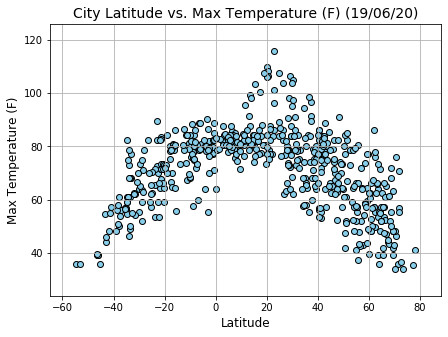

In [113]:
#plot

lat_plot (cleaned_city_data, #dataset
          "Max Temperature (F)", #y-variable
          10, 10, #x-lim settings
          "(19/06/20)") #date
          
#save as PNG file
plt.savefig("../output_data/figure 1.PNG")
              
plt.show()

## Latitude vs. Humidity Plot

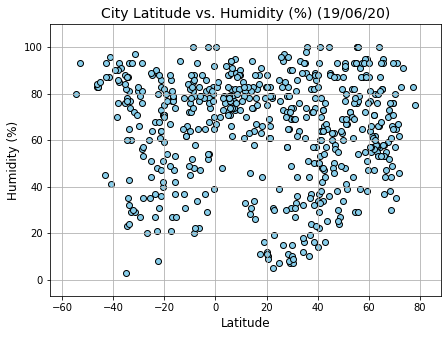

In [114]:
lat_plot (cleaned_city_data, #dataset
          "Humidity (%)", #y-variable
          10, 10, #lim settings
          "(19/06/20)") #date of pull

#save as PNG file
plt.savefig("../output_data/figure 2.PNG")
              
plt.show()

## Latitude vs. Cloudiness Plot

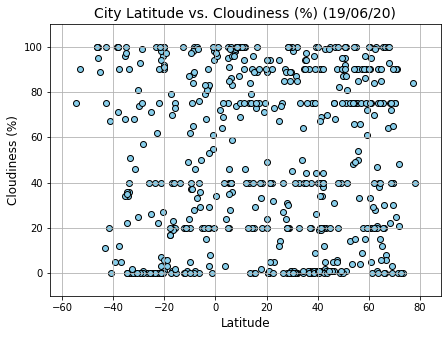

In [115]:
lat_plot (cleaned_city_data, #dataset
          "Cloudiness (%)", #y-variable
          10, 10, #lim settings
          "(19/06/20)") #date

#save as PNG file
plt.savefig("../output_data/figure 3.PNG")
              
plt.show()

## Latitude vs. Wind Speed Plot

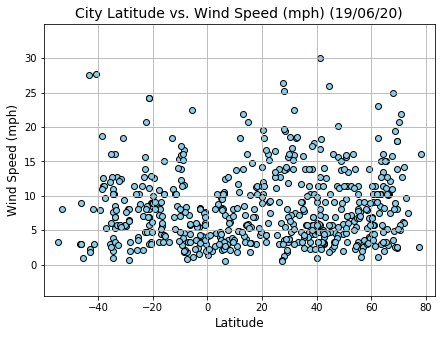

In [116]:
lat_plot (cleaned_city_data, #dataset
          "Wind Speed (mph)", #y-variable
          5, 5, #lim settings
          "(19/06/20)") #date

#save as PNG file
plt.savefig("../output_data/figure 4.PNG")
              
plt.show()

## Linear Regression

In [137]:
# Create a function to create and display linear regression plots
def lat_plot_with_regres (dataframe, hemisphere, variable, width, width_alt,
                          date, label, x_coor, y_coor, diff):
    #plot
    plt.figure(figsize=(7, 5))
    plt.grid()

    plt.scatter(dataframe["Lat"],
                dataframe[variable],
                facecolor='skyblue', 
                marker="o", 
                edgecolor="black")
    
    #formatting                                
    plt.title(f"City Latitude ({hemisphere}) vs. {str(variable)} {date}", fontsize=13)
    plt.xlabel("Latitude", fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.xlim(dataframe["Lat"].min() - width, 
             dataframe["Lat"].max() + width_alt)
    plt.ylim(dataframe[variable].min() - width,
             dataframe[variable].max() + width)
   
    #regression
    label_slope, label_int, label_r, label_p, label_std_err = linregress(dataframe["Lat"],
                                                                         dataframe[variable])
    label_fit = label_slope * dataframe["Lat"] + label_int
    
    label_eq = f"y = {round(label_slope, 2)}x + {round(label_int, 2)}"
    
    if label_r**2>0.001:
        r_sq = f"r-squared = {round(label_r**2, 3)}"
    else:
        r_sq = "r-squared < 0.001"
    
    if label_p>0.001:
        p_val = f"P-value = {round(label_p, 4)}"
    else:
        p_val = "P-value < 0.001"
    
    #plot fig and display lin. reg. findings
    plt.plot(dataframe["Lat"],label_fit,"--", color ="r")
    plt.annotate(label_eq, (x_coor, y_coor), fontsize=14, color ="r")
    plt.annotate(r_sq, (x_coor, y_coor-diff),fontsize=14, color ="r")
    plt.annotate(p_val, (x_coor, y_coor-2*diff),fontsize=14, color ="r")

In [138]:
# Create Northern and Southern Hemisphere DataFrames

northern_data = cleaned_city_data.loc[cleaned_city_data["Lat"]>=0,:]
southern_data = cleaned_city_data.loc[cleaned_city_data["Lat"]<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

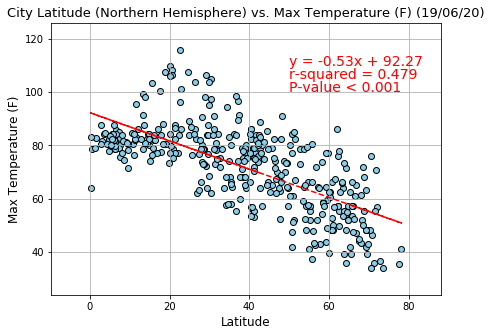

In [139]:
lat_plot_with_regres (northern_data, #dateset
                      "Northern Hemisphere", #title specifier
                      "Max Temperature (F)", #y-variable
                      10, 10, #lim settings
                      "(19/06/20)", #date
                      "n_temp", #variable labels
                      50, 110, 5) #reg. findings display settings

#save as PNG file

plt.savefig("../output_data/figure 5.PNG")
              
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

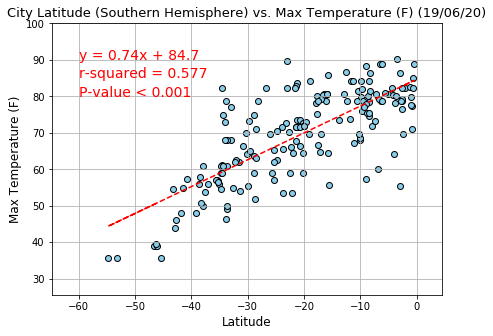

In [120]:
lat_plot_with_regres (southern_data, #dataset
                      "Southern Hemisphere", #title specifier
                      "Max Temperature (F)", #y-variable
                      10, 5, #lim settings
                      "(19/06/20)", #date
                      "s_temp", #variable label
                      -60, 90, 5) #reg. findings display settings

#save as PNG file
plt.savefig("../output_data/figure 6.PNG")
              
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

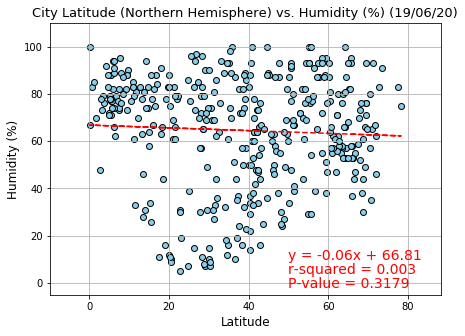

In [121]:
lat_plot_with_regres (northern_data, #dataset
                      "Northern Hemisphere", #title specifier
                      "Humidity (%)", #y-variable
                      10, 10, #lim specifier
                      "(19/06/20)", #date
                      "n_hum", #variable label
                      50, 10, 6) #reg. findings display settings
            
#save as PNG file
plt.savefig("../output_data/figure 7.PNG")
              
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

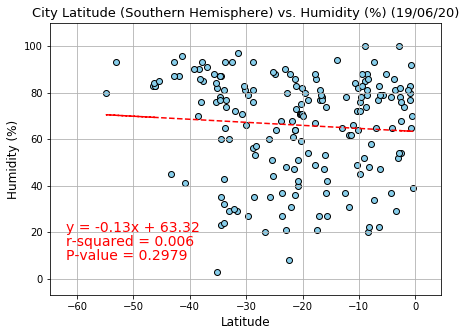

In [122]:
lat_plot_with_regres (southern_data, #dataset
                      "Southern Hemisphere", #title specifier
                      "Humidity (%)", #y-variable
                      10, 5, #lim settings
                      "(19/06/20)", #date
                      "s_hum", #variable label
                      -62, 20, 6) #reg. findings display settings
    
#save as PNG file
plt.savefig("../output_data/figure 8.PNG")
              
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

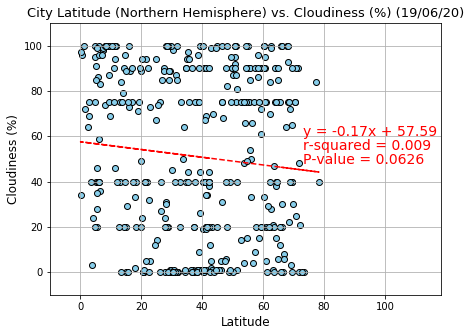

In [123]:
lat_plot_with_regres (northern_data, #dataset
                      "Northern Hemisphere", #title specifier
                      "Cloudiness (%)", #Y-variable
                      10, 40, #lim settings
                      "(19/06/20)", #date
                      "n_cloud", #variable label
                      73, 60, 6) #reg. findings display settings
#save as PNG file
plt.savefig("../output_data/figure 9.PNG")
              
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

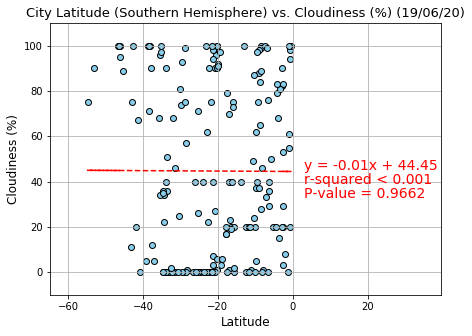

In [140]:
lat_plot_with_regres (southern_data, #dataset
                      "Southern Hemisphere", #title specifier 
                      "Cloudiness (%)", #y-variable
                      10, 40, #lim settings
                      "(19/06/20)", #date
                      "s_cloud", #variable label
                      3, 45, 6) #reg. findings display settings

#save as PNG file
plt.savefig("../output_data/figure 10.PNG")
              
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

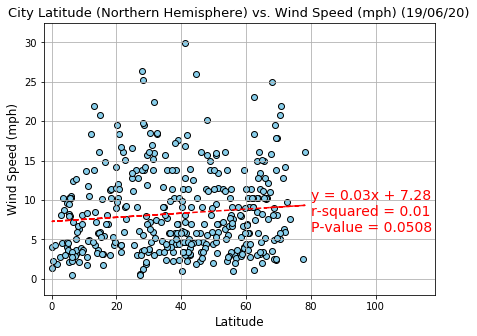

In [142]:
lat_plot_with_regres (northern_data, #dataset
                      "Northern Hemisphere", #title specifier
                      "Wind Speed (mph)", #y-variable
                      2.5, 40, #lim settings
                      "(19/06/20)", #date
                      "n_ws", #variable label
                      80, 10, 2) #reg. findings display settings

#save as PNG file
plt.savefig("../output_data/figure 11.PNG")
              
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

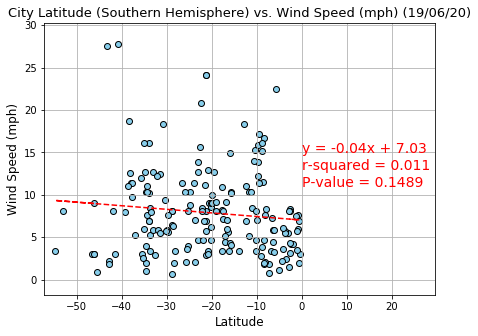

In [143]:
lat_plot_with_regres (southern_data, #dataset
                      "Southern Hemisphere", #title specifier
                      "Wind Speed (mph)", #y-variable
                      2.5, 30, #lim settings
                      "(19/06/20)", #date
                      "n_ws", #variable label 
                      0, 15 ,2) #reg. findings display settings

#save as PNG file
plt.savefig("../output_data/figure 12.PNG")
              
plt.show()